In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fft2, ifft2, fftshift, ifftshift

# Load an example grayscale image
# image = np.random.rand(103, 96)
import pickle
with open('pkls/origs.pkl','rb') as origs:
    __origs = pickle.load(origs)
    image=__origs[0]
    del __origs



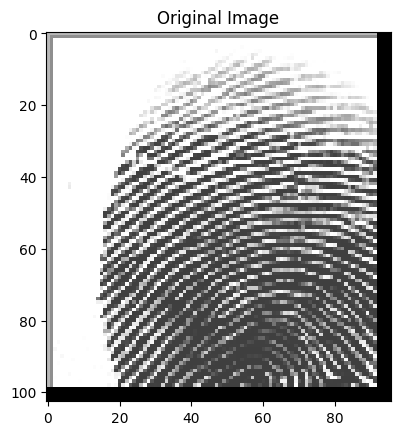

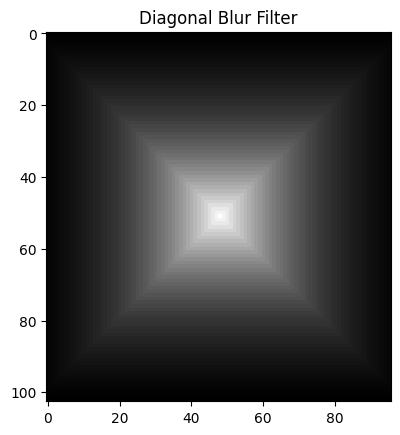

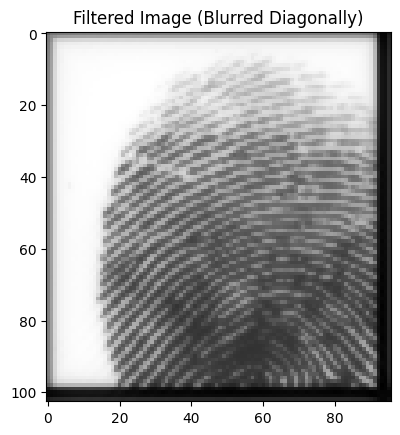

In [3]:
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)  # Shift zero-frequency to the center

# Display original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Generate a diagonal-only filter
def diagonal_blur_filter(shape, strength=10):
    """Creates a filter that blurs along diagonals."""
    rows, cols = shape
    cy, cx = rows // 2, cols // 2  # Center
    y, x = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')
    y, x = y - cy, x - cx  # Shift coordinates to center
    # Diagonal components
    diagonal_positive = np.abs(x - y)  # Positive diagonal
    diagonal_negative = np.abs(x + y)  # Negative diagonal
    # Combine with exponential decay to control blur strength
    filter = np.exp((-diagonal_positive / strength)*.2) *np.exp((-diagonal_negative / strength)*.2)
    return filter

# Create the filter
filter = diagonal_blur_filter(image.shape, strength=10)

# Display the filter
plt.imshow(filter, cmap='gray')
plt.title("Diagonal Blur Filter")
plt.show()

# Apply the filter in the frequency domain
filtered_fft = fft_image_shifted * filter

# Transform back to spatial domain
filtered_fft_unshifted = ifftshift(filtered_fft)
filtered_image = np.abs(ifft2(filtered_fft_unshifted))

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image (Blurred Diagonally)")
plt.show()

In [7]:
diagonal_blur_filter(image.shape, strength=10).shape

(103, 96)